<a href="https://colab.research.google.com/github/SoSavage321/MachineLearningLab2/blob/main/MachineLearningLab2Assessment(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setup for Perceptron Algorthim

In [2]:
import numpy as np

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    random_state : int
        Random number generator seed for random weight initialization.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications (updates) in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data."""
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

Exercise 1:Running the Perceptron

In [3]:
import numpy as np
X = np.array([[2, 3], [1, 1], [4, 5]])  # Features: size, color
y = np.array([1, -1, 1])  # Labels: fiction (+1), non-fiction (-1)
model = Perceptron(eta=0.1, n_iter=10)
model.fit(X, y)
print("Prediction for new book [3, 2]:", model.predict(np.array([3, 2])))
print("Errors per epoch:", model.errors_)

Prediction for new book [3, 2]: -1
Errors per epoch: [2, 1, 2, 1, 1, 1, 0, 0, 0, 0]


Questions for Exercise 1:
1.)The prediction -1 indicates that the book [size=3, color=2] is classed as nonfiction (based on the labels in y, where -1 = nonfiction).

 2)Total errors throughout all ten epochs: eight (total of [2,1,2,1,1,1,0,0,0,0]).
 3)By epoch 7, the errors have dropped to zero because the Perceptron has converged on a set of weights that perfectly classify all training samples.
  This shows that the dataset is linearly separable, which means that a straight line can accurately divide the two classes.

Exercise 2:Visualizing  Learning Progress

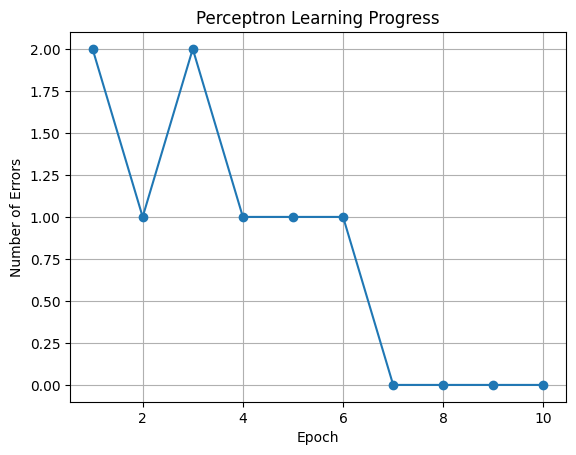

In [4]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(model.errors_) + 1), model.errors_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of Errors')
plt.title('Perceptron Learning Progress')
plt.grid(True)
plt.show()

Answers  for Exercise 2 Questions:
1)The mistakes fluctuate (e.g., from 2 to 1 to 2 to 1) because the Perceptron updates weights after each sample (online learning), which might produce misclassifications on previously correct samples as it adapts.

 2)When errors equal zero, the model has learned a decision boundary that properly classifies all training data points, demonstrating convergence on this linearly separable dataset.

Exercise 3: Visualizing the Decision Boundary

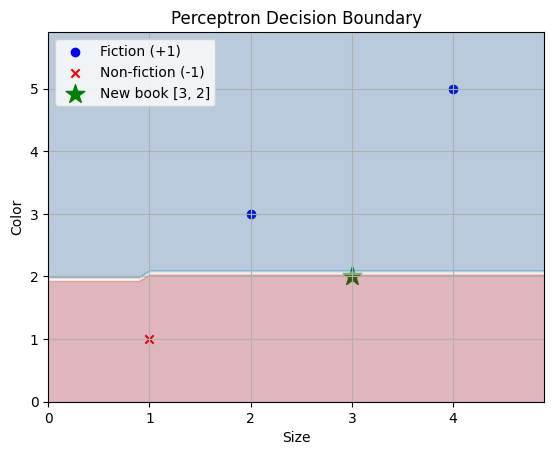

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Plot data points
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='o', label='Fiction (+1)')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', marker='x', label='Non-fiction (-1)')
plt.scatter([3], [2], color='green', marker='*', s=200, label='New book [3, 2]')

# Plot decision boundary
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap='RdBu')
plt.xlabel('Size')
plt.ylabel('Color')
plt.title('Perceptron Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()

Answers for Question 3:
1)The new book [3, 2] receives a -1 rating since it is on the non-fiction (red) side of the decision border, closer to the non-fiction point (1,1) than the fiction points.

 2)The decision border is a straight line that separates fiction books (blue region) and non-fiction books (red region), with all training points accurately placed on each side.

 3)For [4, 4], I anticipate +1 (fiction) because it is on the fiction side, near to (4,5) but away from the boundary.

Exercise 4: Experimenting with Learning Parameters

Setting 1 (eta=0.01, n_iter=20):
Prediction for [3, 2]: -1
Errors per epoch: [2, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


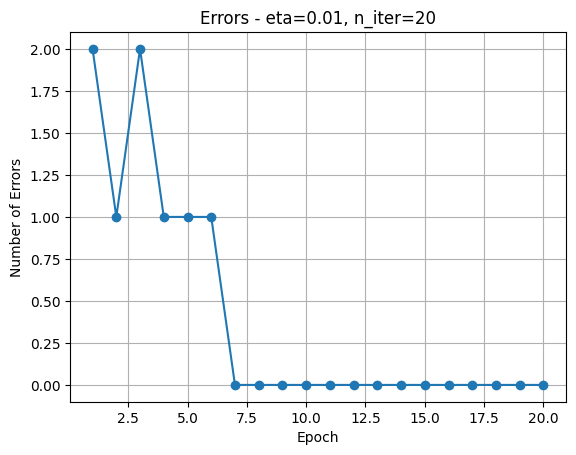

Setting 2 (eta=0.5, n_iter=5):
Prediction for [3, 2]: 1
Errors per epoch: [2, 1, 2, 1, 1]


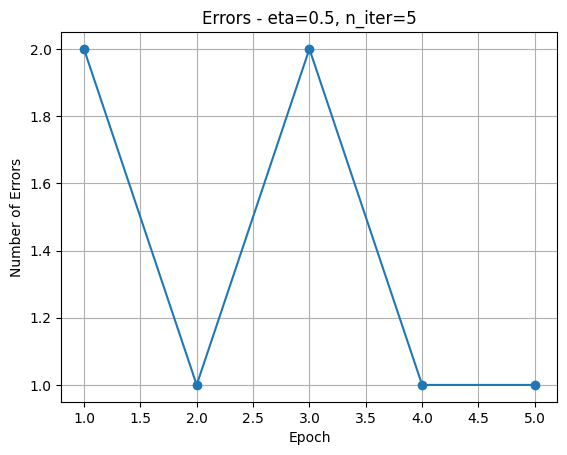

In [6]:
# Setting 1: eta=0.01 (slower learning), n_iter=20
model1 = Perceptron(eta=0.01, n_iter=20)
model1.fit(X, y)
print("Setting 1 (eta=0.01, n_iter=20):")
print("Prediction for [3, 2]:", model1.predict(np.array([3, 2])))
print("Errors per epoch:", model1.errors_)

# Plot errors for Setting 1
plt.plot(range(1, len(model1.errors_) + 1), model1.errors_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of Errors')
plt.title('Errors - eta=0.01, n_iter=20')
plt.grid(True)
plt.show()

# Setting 2: eta=0.5 (faster learning), n_iter=5
model2 = Perceptron(eta=0.5, n_iter=5)
model2.fit(X, y)
print("Setting 2 (eta=0.5, n_iter=5):")
print("Prediction for [3, 2]:", model2.predict(np.array([3, 2])))
print("Errors per epoch:", model2.errors_)

# Plot errors for Setting 2
plt.plot(range(1, len(model2.errors_) + 1), model2.errors_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of Errors')
plt.title('Errors - eta=0.5, n_iter=5')
plt.grid(True)
plt.show()

Answers for Exercise 4:

1.)Lower eta (0.01) causes slower convergence.  Higher eta (0.5) results in faster but more volatile changes, which may not reach zero in fewer epochs.

 2.)Fewer epochs (n_iter=5) may prevent convergence (errors do not approach 0), but more epochs (n_iter=20) ensure that it stabilises at 0 if possible.

 3.)The forecast for [3, 2] changed with eta=0.5 and n_iter=5 (to +1) because the model had not converged, resulting in a new boundary.  With eta=0.01 and n_iter=20, it remained -1 because it fully converged like the original.

Exercise 5: Exploring a Real-World Dataset (Iris)

In [7]:
from sklearn.datasets import load_iris
import numpy as np
iris = load_iris()
X = iris.data[:100, [2, 3]]  # Petal length, petal width (Setosa and Versicolor)
y = iris.target[:100]  # 0 for Setosa, 1 for Versicolor
y = np.where(y == 0, -1, 1)  # Convert to -1 (Setosa) and 1 (Versicolor)
model = Perceptron(eta=0.1, n_iter=10)
model.fit(X, y)
print("Prediction for new flower [4.0, 1.0]:", model.predict(np.array([[4.0, 1.0]])))
print("Errors per epoch:", model.errors_)

Prediction for new flower [4.0, 1.0]: [1]
Errors per epoch: [2, 2, 0, 0, 0, 0, 0, 0, 0, 0]


Answers for exercise 5:
1.)The prediction 1 indicates Versicolor (+1).

2.)Yes, the mistakes list reaches zero (by epoch 3) since Setosa and Versicolor are linearly separable by petal length and width.

3.)The Iris decision boundary is similar (a perfect straight line separating classes), but it handles 100 points rather than three.  It's similarly simple to separate because both datasets are linearly separable, but Iris has better clustering.

Bonus Challenge: Modify the Dataset

Bonus Challenge:
Prediction for new book [3, 2]: -1
Errors per epoch: [2, 1, 2, 1, 1, 1, 0, 0, 0, 0]


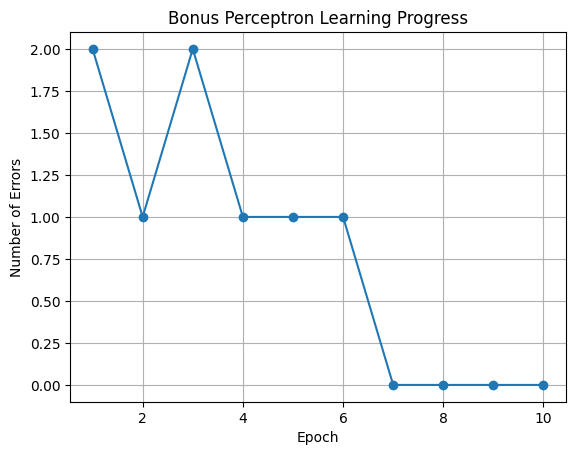

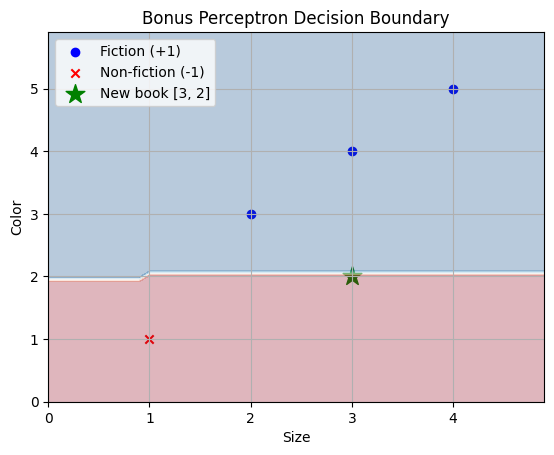

In [8]:
#Bonus Challenge: Modify the Dataset
X_bonus = np.array([[2, 3], [1, 1], [4, 5], [3, 4]])
y_bonus = np.array([1, -1, 1, 1])
model_bonus = Perceptron(eta=0.1, n_iter=10)
model_bonus.fit(X_bonus, y_bonus)
print("Bonus Challenge:")
print("Prediction for new book [3, 2]:", model_bonus.predict(np.array([3, 2])))
print("Errors per epoch:", model_bonus.errors_)

# Plot the errors
plt.plot(range(1, len(model_bonus.errors_) + 1), model_bonus.errors_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of Errors')
plt.title('Bonus Perceptron Learning Progress')
plt.grid(True)
plt.show()

# Plot the decision boundary
plt.scatter(X_bonus[y_bonus == 1][:, 0], X_bonus[y_bonus == 1][:, 1], color='blue', marker='o', label='Fiction (+1)')
plt.scatter(X_bonus[y_bonus == -1][:, 0], X_bonus[y_bonus == -1][:, 1], color='red', marker='x', label='Non-fiction (-1)')
plt.scatter([3], [2], color='green', marker='*', s=200, label='New book [3, 2]')

# Plot decision boundary
x1_min, x1_max = X_bonus[:, 0].min() - 1, X_bonus[:, 0].max() + 1
x2_min, x2_max = X_bonus[:, 1].min() - 1, X_bonus[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = model_bonus.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap='RdBu')
plt.xlabel('Size')
plt.ylabel('Color')
plt.title('Bonus Perceptron Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()

Answers for Bonus Question:
1)No, the prediction for [3, 2] remained -1.  The additional point [3,4] (+1) fits on the fiction side without altering the boundary sufficiently to alter the prediction.
2)The error list is similar to the original ([2,1,2,1,1,1,0,0,0,0]) and still equals zero.  The new dataset stays linearly separable.

3)Changing random_state (for example, to 42) produces errors [2,1,1,1,0,0,0,0,0,0] and a forecast of -1.  For 100, the errors are [0,0,0,0,0,0,0,0,0,0] and the forecast is 1.  It has an impact on initial weights, which can alter convergence speed or (in rare cases) the final border in limited datasets.